In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('petrol_consumption.csv', encoding = 'latin')

In [3]:
df.shape

(48, 5)

In [5]:
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [6]:
df.corr()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
Petrol_tax,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average_income,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved_Highways,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),-0.288037,0.157070,-0.064129,1.000000,0.698965
Petrol_Consumption,-0.451280,-0.244862,0.019042,0.698965,1.000000


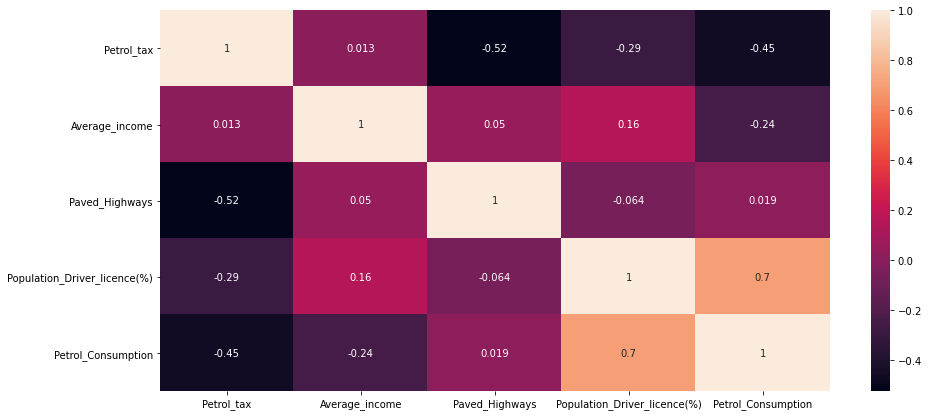

In [8]:
plt.figure(figsize = (15, 7))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [9]:
df.isnull().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

In [10]:
df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


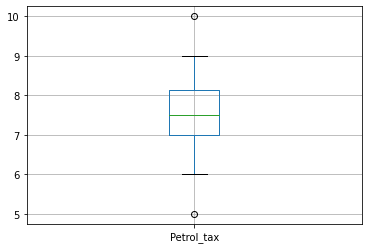

In [12]:
df.boxplot(['Petrol_tax'])
plt.show()

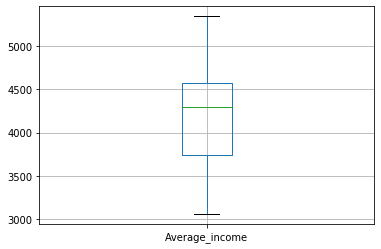

In [10]:
df.boxplot(['Average_income'])

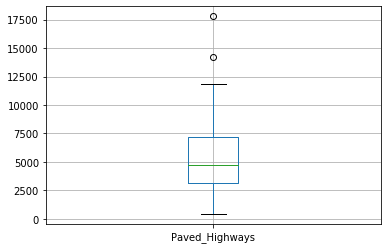

In [11]:
df.boxplot(['Paved_Highways'])

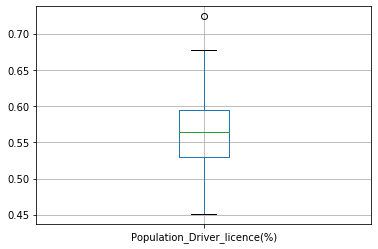

In [12]:
df.boxplot(['Population_Driver_licence(%)'])

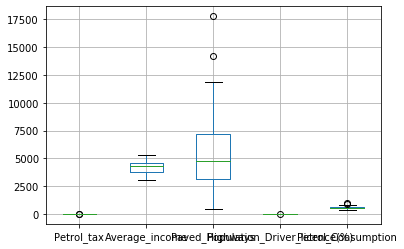

In [13]:
df.boxplot()

# Inpdendent Variables

In [13]:
x = df.iloc[:, :-1]
print('Indepent Variables are:')
x.head()

Indepent Variables are:


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [14]:
y = df.iloc[:, -1:]
print('Target Variable is:')
y.head()

Target Variable is:


,Petrol_Consumption
0,541
1,524
2,561
3,414
4,410


In [15]:
from sklearn import linear_model as lm

In [16]:
from sklearn.metrics import mean_squared_error
lin_model = lm.LinearRegression()

# Model Building

In [17]:
model = lin_model.fit(x,y)
model

LinearRegression()

In [18]:
model.score(x, y)

0.6786867115698209

In [19]:
# Slope

model.coef_

array([[-3.47901492e+01, -6.65887518e-02, -2.42588889e-03,
         1.33644936e+03]])

In [20]:
# Intercept
model.intercept_

array([377.29114647])

In [21]:
y_hat = model.predict(x)
print('Predicted Petrol Consumption are:\n', y_hat)

Predicted Petrol Consumption are:
 [[523.23372749]
 [553.11530293]
 [578.10744578]
 [493.35625176]
 [532.02892629]
 [433.55141589]
 [318.73259324]
 [491.50595563]
 [489.02463498]
 [550.39466272]
 [500.48954932]
 [442.25333892]
 [563.31260606]
 [566.0237744 ]
 [638.06601138]
 [604.30550439]
 [597.49738202]
 [596.40345112]
 [772.9677508 ]
 [682.70972973]
 [694.9794757 ]
 [570.24033097]
 [415.07930617]
 [460.22150127]
 [507.02812076]
 [531.91824029]
 [588.64881068]
 [612.08788703]
 [558.02256272]
 [471.98285862]
 [566.90705013]
 [581.42200158]
 [651.64983584]
 [613.86729832]
 [506.41719219]
 [716.82376287]
 [647.28207972]
 [641.93375943]
 [717.64832948]
 [733.05284779]
 [662.87034473]
 [633.06544672]
 [644.48932597]
 [556.96750449]
 [713.79948278]
 [519.67828001]
 [670.3978699 ]
 [569.438479  ]]


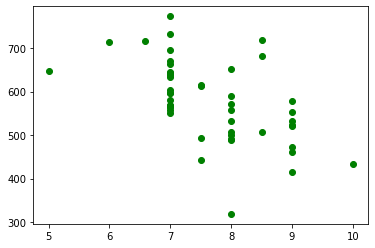

In [22]:
plt.scatter(x['Petrol_tax'], y_hat, color = 'g')
plt.show()

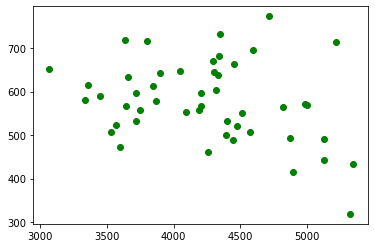

In [23]:
plt.scatter(x['Average_income'], y_hat, color = 'g')
plt.show()

In [24]:
print('Mean Squared Error is:', mean_squared_error(y, y_hat))

Mean Squared Error is: 3938.5410046485035


In [25]:
print('Root Mean Squared Error is:', np.sqrt(mean_squared_error(y, y_hat)))

Root Mean Squared Error is: 62.757796365459676


In [29]:
# OLS = Ordinary Least Squares
import statsmodels.api as sm
model = sm.OLS(y, x).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:     Petrol_Consumption   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.986
Method:                 Least Squares   F-statistic:                              867.8
Date:                Sat, 27 Feb 2021   Prob (F-statistic):                    3.17e-41
Time:                        18:37:27   Log-Likelihood:                         -269.00
No. Observations:                  48   AIC:                                      546.0
Df Residuals:                      44   BIC:                                      553.5
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------